<a href="https://colab.research.google.com/github/thien1892/Deep-Learning-for-Computer-Vision/blob/main/1_6_How_to_Use_Image_Data_Augmentation_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Use Image Data Augmentation in Keras
# 1. Horizontal and Vertical Shift Augmentation
- Specifically, a value in the range between no shift and the percentage or number of pixels
will be sampled for each image and the shift performed, e.g. [0, value]. Alternately, you
can specify a tuple or array of the min and max range from which the shift will be shifted; for
example: [-100, 100] or [-0.5, 0.5].

In [1]:
import tensorflow as tf
keras = tf.keras

In [3]:
from urllib.request import urlretrieve
URL = 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/06/Ardea_modesta.jpg/300px-Ardea_modesta.jpg'
urlretrieve(URL, '/content/conco.jpg')

('/content/conco.jpg', <http.client.HTTPMessage at 0x7fb3243fffd0>)

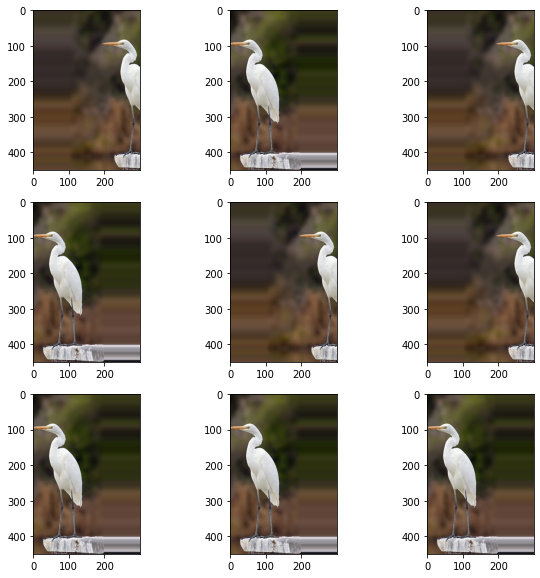

In [10]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('conco.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-100,100])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
pyplot.figure(figsize=(10,10))
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  # convert to unsigned integers for viewing
  image = batch[0].astype('uint8')
  # plot raw pixel data
  pyplot.imshow(image)
# show the figure
pyplot.show()

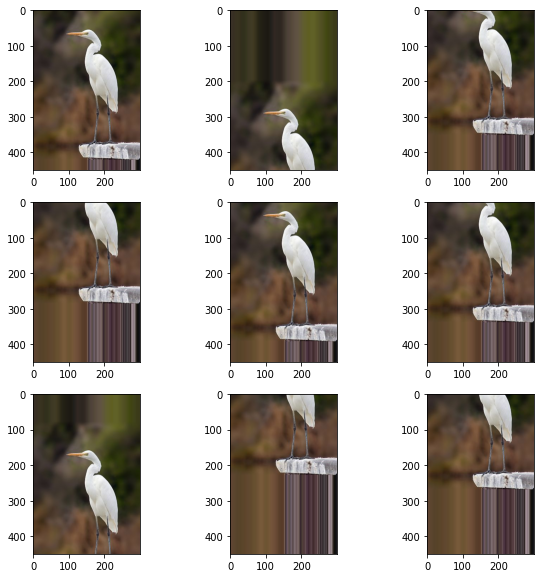

In [11]:
# example of vertical shift image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('conco.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(height_shift_range=0.5)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
pyplot.figure(figsize=(10,10))
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  # convert to unsigned integers for viewing
  image = batch[0].astype('uint8')
  # plot raw pixel data
  pyplot.imshow(image)
# show the figure
pyplot.show()

# 2. Horizontal and Vertical Flip Augmentation

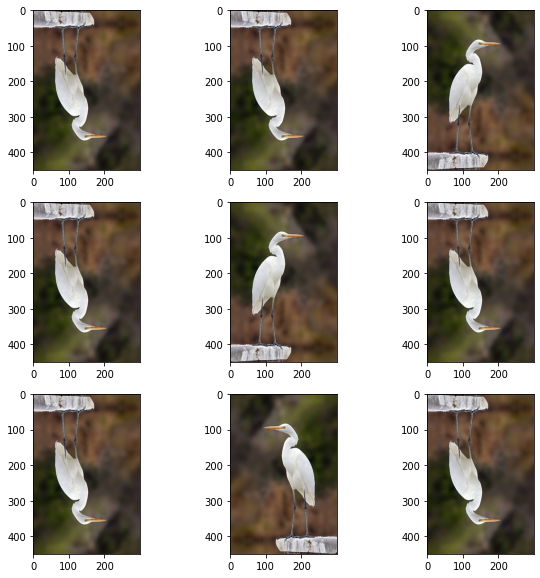

In [14]:
# example of horizontal flip image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('conco.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True,  vertical_flip = True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
pyplot.figure(figsize=(10,10))
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  # convert to unsigned integers for viewing
  image = batch[0].astype('uint8')
  # plot raw pixel data
  pyplot.imshow(image)
  # show the figure
pyplot.show()

# 3. Random Rotation Augmentation
- The example below demonstrates random
rotations via the rotation range argument, with rotations to the image between 0 and 90
degrees.

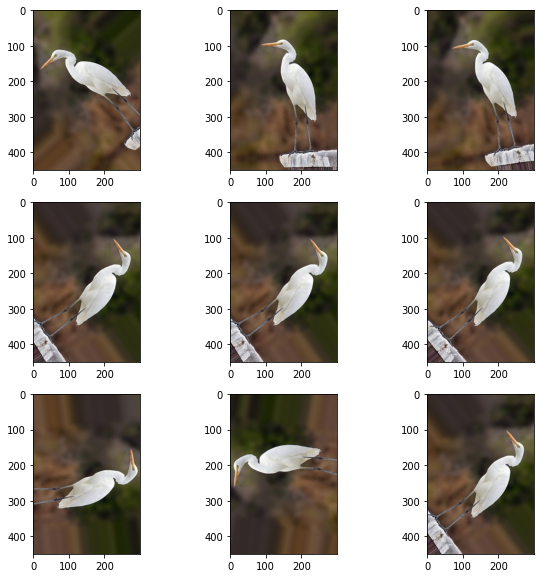

In [17]:
# example of random rotation image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('conco.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
pyplot.figure(figsize=(10,10))
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  # convert to unsigned integers for viewing
  image = batch[0].astype('uint8')
  # plot raw pixel data
  pyplot.imshow(image)
  # show the figure
pyplot.show()

# 4. Random Brightness Augmentation
- Values less than 1.0 darken the
image, e.g. [0.5, 1.0], whereas values larger than 1.0 brighten the image, e.g. [1.0, 1.5], where 1.0
has no effect on brightness. The example below demonstrates a brightness image augmentation,
allowing the generator to randomly darken the image between 1.0 (no change) and 0.2 or 20%

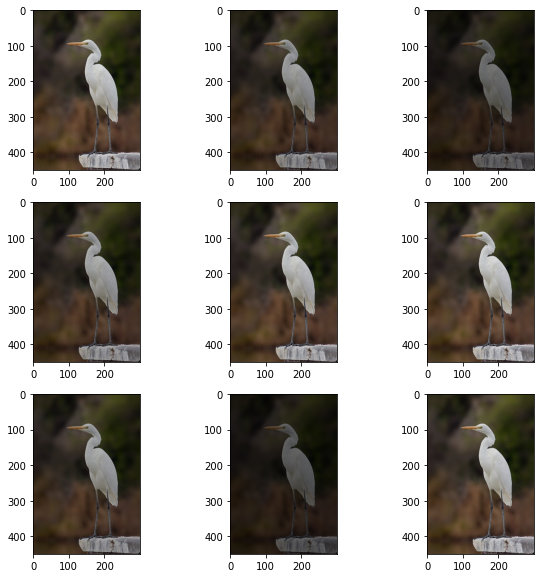

In [18]:
# example of brighting image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('conco.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
pyplot.figure(figsize=(10,10))
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  # convert to unsigned integers for viewing
  image = batch[0].astype('uint8')
  # plot raw pixel data
  pyplot.imshow(image)
# show the figure
pyplot.show()

# 5. Random Zoom Augmentation
- If a float is specified, then the range
for the zoom will be [1-value, 1+value]. For example, if you specify 0.3, then the range will be
[0.7, 1.3], or between 70% (zoom in) and 130% (zoom out). The zoom amount is uniformly
randomly sampled from the zoom region for each dimension (width, height) separately
- The zoom may not feel intuitive. Note that zoom values less than 1.0 will zoom the image
in, e.g. [0.5,0.5] makes the object in the image 50% larger or closer, and values larger than 1.0
will zoom the image out by 50%, e.g. [1.5, 1.5] makes the object in the image smaller or further
away. A zoom of [1.0,1.0] has no effect.

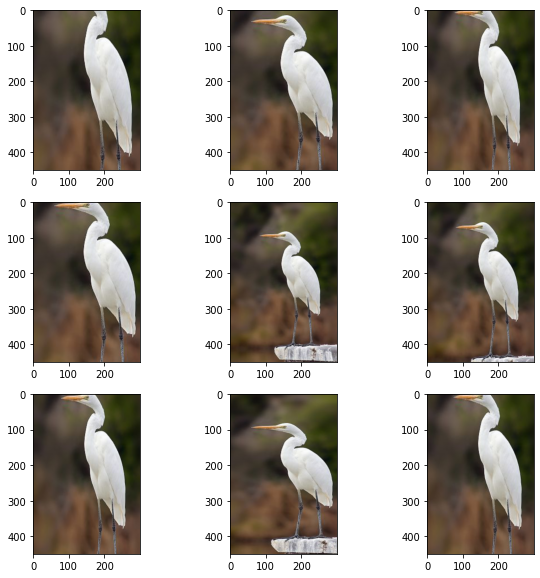

In [20]:
# example of zoom image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('conco.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
pyplot.figure(figsize=(10,10))
for i in range(9):
  # define subplot
  pyplot.subplot(330 + 1 + i)
  # generate batch of images
  batch = it.next()
  # convert to unsigned integers for viewing
  image = batch[0].astype('uint8')
  # plot raw pixel data
  pyplot.imshow(image)
# show the figure
pyplot.show()

# Extensions
This section lists some ideas for extending the tutorial that you may wish to explore.
- Your Own Image. Experiment with data augmentation on your own image, including
varying the augmentation parameters.
- Save Images. Experiment with configuring the image data generator to save augmented
images to file.
- Other Augmentations. Experiment with other augmentation methods not covered in
this tutorial, such as shear.